In [2]:
#https://towardsdatascience.com/hands-on-markov-chains-example-using-python-8138bf2bd971
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue', 'xkcd:scarlet']

In [3]:
state_1 = [0.2,0.5,0.3,0,0]
state_2 = [0,0.5,0.5,0,0]
state_3 = [0,0,1,0,0]
state_4 = [0,0,0,0,1]
state_5 = [0,0,0,0.5,0.5]
trans_matrix = [state_1,state_2,state_3,state_4,state_5]
trans_matrix = np.array(trans_matrix)
trans_matrix

array([[0.2, 0.5, 0.3, 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0.5, 0.5]])

In [4]:
def t(N):
    step = np.arange(1,N+1,1)
    y = []
    for s in step:
        v = 0.5**s
        y.append(v)
    return y

Text(0.5, 0, '$N-1$')

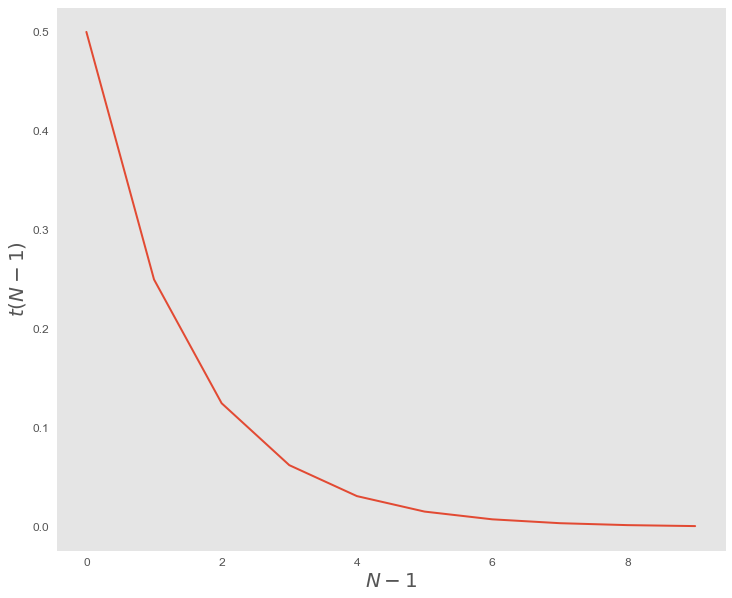

In [5]:
plt.plot(t(10))
plt.ylabel(r'$t(N-1)$',fontsize=20)
plt.xlabel(r'$N-1$',fontsize=20)

ต่อไปนี้มันจะหาว่าที่ prob(2 -> 2) เป็นเท่าไหร่ มันก็เลยสร้างหาฟังก์ชัน prob(N) ที่คืนค่า prob ที่จะลง 2 -> 2 ในการเดิน N ก้าว

In [6]:
def prob(N):
    states = np.arange(1,6,1)
    steps = np.arange(1,N+1,1)
    n=1000
    state_collection = []
    for k in range(n):
        start = 2
        for i in range(N):
            start = np.random.choice(states,p=trans_matrix[start-1])
        if start==2:
            state_collection.append(1)
        else:
            state_collection.append(0)
    state_collection = np.array(state_collection)
    print(state_collection)
    return state_collection.sum()/n

In [7]:
def p(N):
    step = np.arange(1,N+1,1)
    y = []
    for s in step:
        v = prob(s)
        y.append(v)
    return y

[0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0
 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0
 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0
 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0
 0 1 0 1 1 0 0 1 1 0 1 0 

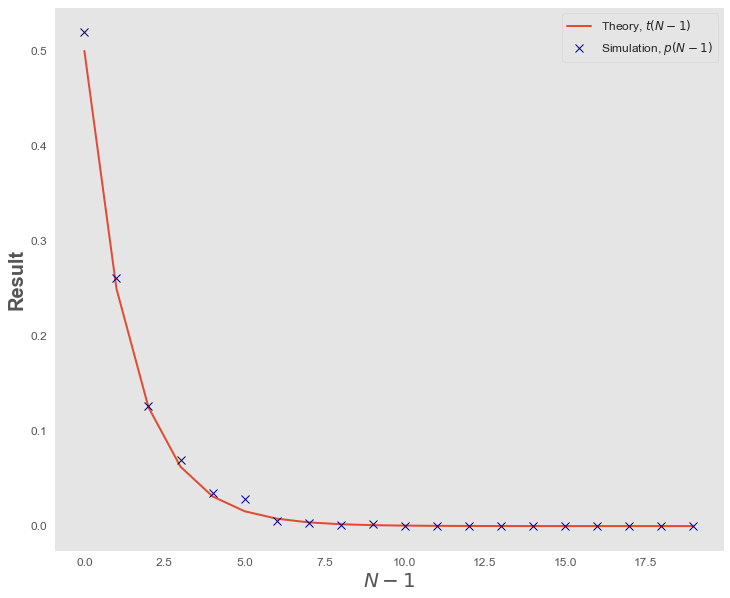

In [8]:
p_20 = p(20) # เพื่อ plot graph โปรแกรมจะลอง vary หา prob ตั้งแต่ 1 - 20 steps
print(p_20)
plt.plot(t(20),label=r'Theory, $t(N-1)$')
plt.plot(p_20,'x',label=r'Simulation, $p(N-1)$',color='navy')
plt.ylabel(r'Result',fontsize=20)
plt.xlabel(r'$N-1$',fontsize=20)
plt.legend()